### Multiple Instance Learning
In this project we aim to find succesful bag representations for the dataset musk1.csv. After finding some good bag representations, we will try some classifiers to have a good model in order to predict whether the atom need to be musked or not.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
    

In [2]:
df = pd.read_csv("C:/Users/a_kok/Desktop/Dersler/IE 582/Musk1.csv",header = None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Columns: 168 entries, 0 to 167
dtypes: int64(168)
memory usage: 624.9 KB


In [4]:
df = df.rename(columns = {0:"class",1:"bag_id"})

In [5]:
df[df["class"] == 1]["bag_id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int64)

In [130]:
df.head()

,class,bag_id,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


In [7]:
df[df["class"] == 1].describe()

,class,bag_id,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
count,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1.0,25.531401,39.251208,-135.405797,-88.579710,7.265700,-112.574879,-25.657005,-0.318841,5.260870,...,-235.855072,-204.024155,-114.922705,-34.536232,22.028986,63.913043,69.425121,-34.314010,-9.483092,29.801932
std,0.0,13.413431,16.871435,80.572223,59.945543,62.963095,26.110351,81.082322,95.332351,65.144794,...,9.318958,81.390074,116.255259,65.893835,82.390729,52.672022,30.830463,11.306968,40.265845,43.353642
min,1.0,1.000000,-7.000000,-199.000000,-163.000000,-113.000000,-117.000000,-176.000000,-170.000000,-200.000000,...,-252.000000,-307.000000,-217.000000,-135.000000,-126.000000,-78.000000,39.000000,-52.000000,-156.000000,-72.000000
25%,1.0,14.000000,28.500000,-194.000000,-145.000000,-54.000000,-117.000000,-93.500000,-51.500000,-10.000000,...,-240.000000,-262.000000,-209.000000,-117.000000,-43.500000,27.000000,47.000000,-43.000000,-22.000000,-6.000000
50%,1.0,26.000000,42.000000,-171.000000,-110.000000,28.000000,-117.000000,-25.000000,43.000000,7.000000,...,-237.000000,-237.000000,-203.000000,-17.000000,3.000000,65.000000,64.000000,-36.000000,-2.000000,33.000000
75%,1.0,37.000000,51.000000,-110.000000,-24.000000,32.000000,-117.000000,54.000000,59.500000,48.500000,...,-233.500000,-165.000000,26.000000,21.000000,86.000000,116.500000,78.000000,-29.000000,12.000000,66.000000
max,1.0,47.000000,85.000000,98.000000,42.000000,157.000000,214.000000,137.000000,211.000000,142.000000,...,-142.000000,66.000000,77.000000,60.000000,211.000000,197.000000,173.000000,24.000000,82.000000,118.000000


In [8]:
df[df["class"] == 0].describe()

,class,bag_id,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
count,269.0,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.0,73.052045,38.330855,-108.397770,-72.059480,22.550186,-112.085502,2.472119,-29.178439,9.687732,...,-210.858736,-204.698885,-103.137546,-18.070632,49.278810,91.940520,97.628253,-33.985130,-39.137546,36.724907
std,0.0,12.623313,18.992492,92.276241,74.828586,83.415400,30.598448,98.035804,113.033469,83.121916,...,81.853497,95.531713,125.865895,64.565126,89.279665,42.743379,54.028144,18.881399,65.833913,61.146559
min,0.0,48.000000,-9.000000,-199.000000,-166.000000,-115.000000,-117.000000,-184.000000,-170.000000,-231.000000,...,-250.000000,-324.000000,-217.000000,-134.000000,-124.000000,-18.000000,35.000000,-132.000000,-258.000000,-72.000000
25%,0.0,60.000000,31.000000,-191.000000,-141.000000,-51.000000,-117.000000,-85.000000,-160.000000,-8.000000,...,-240.000000,-272.000000,-207.000000,-39.000000,-24.000000,69.000000,59.000000,-42.000000,-36.000000,-20.000000
50%,0.0,79.000000,42.000000,-124.000000,-102.000000,28.000000,-117.000000,38.000000,33.000000,21.000000,...,-236.000000,-235.000000,-182.000000,-14.000000,54.000000,98.000000,80.000000,-36.000000,-20.000000,51.000000
75%,0.0,82.000000,49.000000,-27.000000,5.000000,109.000000,-116.000000,82.000000,50.000000,62.000000,...,-229.000000,-151.000000,37.000000,22.000000,136.000000,120.000000,113.000000,-27.000000,4.000000,88.000000
max,0.0,92.000000,130.000000,91.000000,83.000000,157.000000,238.000000,200.000000,214.000000,188.000000,...,141.000000,72.000000,173.000000,185.000000,253.000000,291.000000,302.000000,13.000000,39.000000,235.000000


In [9]:
data.rename(columns = {0:"class"},inplace = True)
data.sort_values(by = "class",inplace = True)
data["id"] = list(range(1,897))
long_data = pd.melt(data, id_vars=['id',"class"])
long_data = long_data.rename(columns = {"variable":"time"})
long_data = long_data.sort_values(by = ["id","time"]).reset_index(drop = True)

IndentationError: unexpected indent (Temp/ipykernel_12604/2567073663.py, line 2)

In [12]:
df_long = df.copy()

In [13]:
df_long["id"] = list(range(1,477))

In [132]:
df_long.head()

,id,class,bag_id,variable,value
0,1,1,1,2,42
1,1,1,1,3,-198
2,1,1,1,4,-109
3,1,1,1,5,-75
4,1,1,1,6,-117


In [15]:
df_long = pd.melt(df_long, id_vars=['id',"class","bag_id"])

In [16]:
df_long = df_long.sort_values(by = ["id","variable"]).reset_index(drop = True)

In [131]:
df_long[df_long["class"] == 0].head()

,id,class,bag_id,variable,value
34362,208,0,48,2,40
34363,208,0,48,3,-39
34364,208,0,48,4,30
34365,208,0,48,5,-113
34366,208,0,48,6,-115


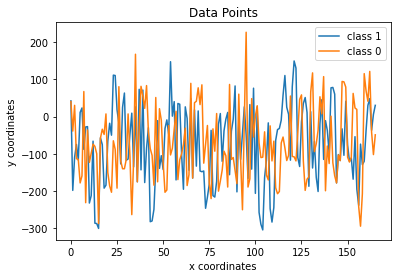

In [20]:
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(df_long[df_long["id"] == 1].index,df_long[df_long["id"] == 1]["value"],label = "class 1")
ax.plot(df_long[df_long["id"] == 1].index,df_long[df_long["id"] == 208]["value"],label = "class 0")
ax.legend()
ax.set(title= "Data Points",
      xlabel = "x coordinates",
      ylabel = "y coordinates")

plt.show()

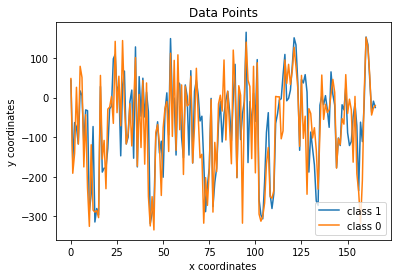

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_long[df_long["id"] == 1].index,df_long[df_long["id"] == 10]["value"],label = "class 1")
ax.plot(df_long[df_long["id"] == 1].index,df_long[df_long["id"] == 218]["value"],label = "class 0")
ax.legend()
ax.set(title= "Data Points",
      xlabel = "x coordinates",
      ylabel = "y coordinates")

plt.show()

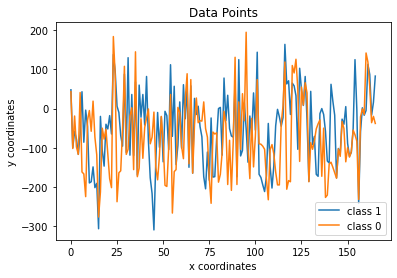

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_long[df_long["id"] == 1].index,df_long[df_long["id"] == 21]["value"],label = "class 1")
ax.plot(df_long[df_long["id"] == 1].index,df_long[df_long["id"] == 228]["value"],label = "class 0")
ax.legend()
ax.set(title= "Data Points",
      xlabel = "x coordinates",
      ylabel = "y coordinates")

plt.show()

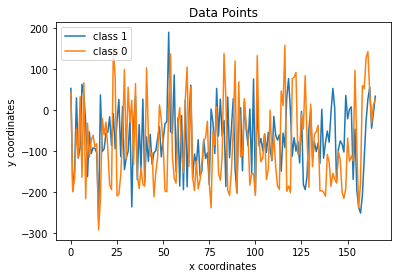

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_long[df_long["id"] == 1].index,df_long[df_long["id"] == 31]["value"],label = "class 1")
ax.plot(df_long[df_long["id"] == 1].index,df_long[df_long["id"] == 238]["value"],label = "class 0")
ax.legend()
ax.set(title= "Data Points",
      xlabel = "x coordinates",
      ylabel = "y coordinates")

plt.show()

In [43]:
df_std = df.groupby(by = "bag_id").std()

In [98]:
train_labels = df.groupby(by = "bag_id").mean()["class"]

In [45]:
df_std = df_std.drop(columns = "class")

In [47]:
train_features = df_std

#### First we wanted to try standart deviation bag representation. We though that standart deviation of class 1 points are lower than class 2 points.

In [67]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [101]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,scoring = "accuracy", cv = 10, verbose=1, random_state=42)
# Fit the random search model
rf_fit = rf_cv.fit(train_features, train_labels)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


#### Random forest classifier with the following parameters gave us the best accuracy score 0.728 which does not seem very successful

In [102]:
rf_fit.best_score_

0.7288888888888889

In [103]:
rf_fit.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=66)

In [110]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100],
             'kernel': ['linear','poly','rbf'],
             'degree': [5,6,7]}
 
grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=10, verbose=1)
 
# fitting the model for grid search
grid_fit = grid.fit(train_features, train_labels)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


#### Support vector machine with the following best parameters among the parameter grid gave us a accuracy score 0.7356 which seems better than random forest classifier.

In [111]:
grid_fit.best_score_

0.7355555555555556

In [112]:
grid_fit.best_estimator_

SVC(C=5, degree=5)

#### Second we wanted to try range  bag representation. We though that range of class 1 points are lower than class 2 points.

In [119]:
df_max = df.groupby(by = "bag_id").max()
df_min = df.groupby(by = "bag_id").min()
df_max = df_max.drop(columns = "class")
df_min = df_min.drop(columns = "class")

In [120]:
df_range = df_max - df_min

In [122]:
train_features = df_range

In [123]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,scoring = "accuracy", cv = 10, verbose=1, random_state=42)
# Fit the random search model
rf_fit = rf_cv.fit(train_features, train_labels)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


#### Random forest classifier with the following parameters gave us the best accuracy score 0.722 which does not seem very successful

In [124]:
rf_fit.best_score_

0.7222222222222223

In [125]:
rf_fit.best_estimator_

RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=83)

In [126]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100],
             'kernel': ['linear','poly','rbf'],
             'degree': [5,6,7]}
 
grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=10, verbose=1)
 
# fitting the model for grid search
grid_fit = grid.fit(train_features, train_labels)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


#### Support vector machine with the following best parameters among the parameter grid gave us a accuracy score 0.7278 which seems better than random forest classifier.

In [127]:
grid_fit.best_score_

0.7277777777777777

In [128]:
grid_fit.best_estimator_

SVC(C=10, degree=5)

To conclude, we tried range and standart deviation bag representation on musk dataset. They dont gave us much good results but still it may be useful to use in predictions. We used randomclassifier and support vector machine methods. We get better results with the support vector machine result. In future, we can try more complex representations.